In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Checking null values

In [5]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

# we have seen there are so many null values are there and so many null columns are there

In [6]:
df=df.drop(["wepp_id","generation_gwh_2019"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df=df.drop(["other_fuel2","other_fuel3"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,WRI,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,WRI,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,WRI,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [9]:
df=df.drop(["generation_gwh_2013"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df=df.drop(["estimated_generation_gwh"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,...,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,...,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['latitude']=imp.fit_transform(df['latitude'].values.reshape(-1,1))

In [13]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['longitude']=imp.fit_transform(df['longitude'].values.reshape(-1,1))

In [14]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['other_fuel1']=imp.fit_transform(df['other_fuel1'].values.reshape(-1,1))

In [15]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['commissioning_year']=imp.fit_transform(df['commissioning_year'].values.reshape(-1,1))

In [16]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['owner']=imp.fit_transform(df['owner'].values.reshape(-1,1))

In [17]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['geolocation_source']=imp.fit_transform(df['geolocation_source'].values.reshape(-1,1))

In [18]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['year_of_capacity_data']=imp.fit_transform(df['year_of_capacity_data'].values.reshape(-1,1))

In [19]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_gwh_2014']=imp.fit_transform(df['generation_gwh_2014'].values.reshape(-1,1))

In [20]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_gwh_2015']=imp.fit_transform(df['generation_gwh_2015'].values.reshape(-1,1))

In [21]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_gwh_2016']=imp.fit_transform(df['generation_gwh_2016'].values.reshape(-1,1))

In [22]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_gwh_2017']=imp.fit_transform(df['generation_gwh_2017'].values.reshape(-1,1))

In [23]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_gwh_2018']=imp.fit_transform(df['generation_gwh_2018'].values.reshape(-1,1))

In [24]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
df['generation_data_source']=imp.fit_transform(df['generation_data_source'].values.reshape(-1,1))

In [25]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

<AxesSubplot:>

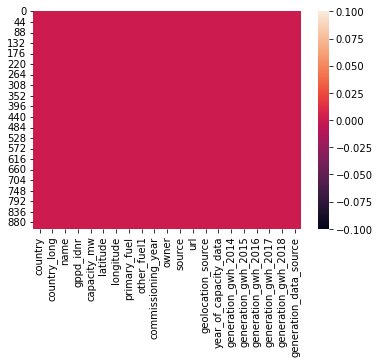

In [26]:
import seaborn as sns
sns.heatmap(df.isnull())

In [27]:
df.shape

(907, 21)

In [28]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'owner', 'source', 'url', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [29]:
df=df.drop(["commissioning_year"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority


In [30]:
df=df.drop(["other_fuel1"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority


# EDA

pairplot

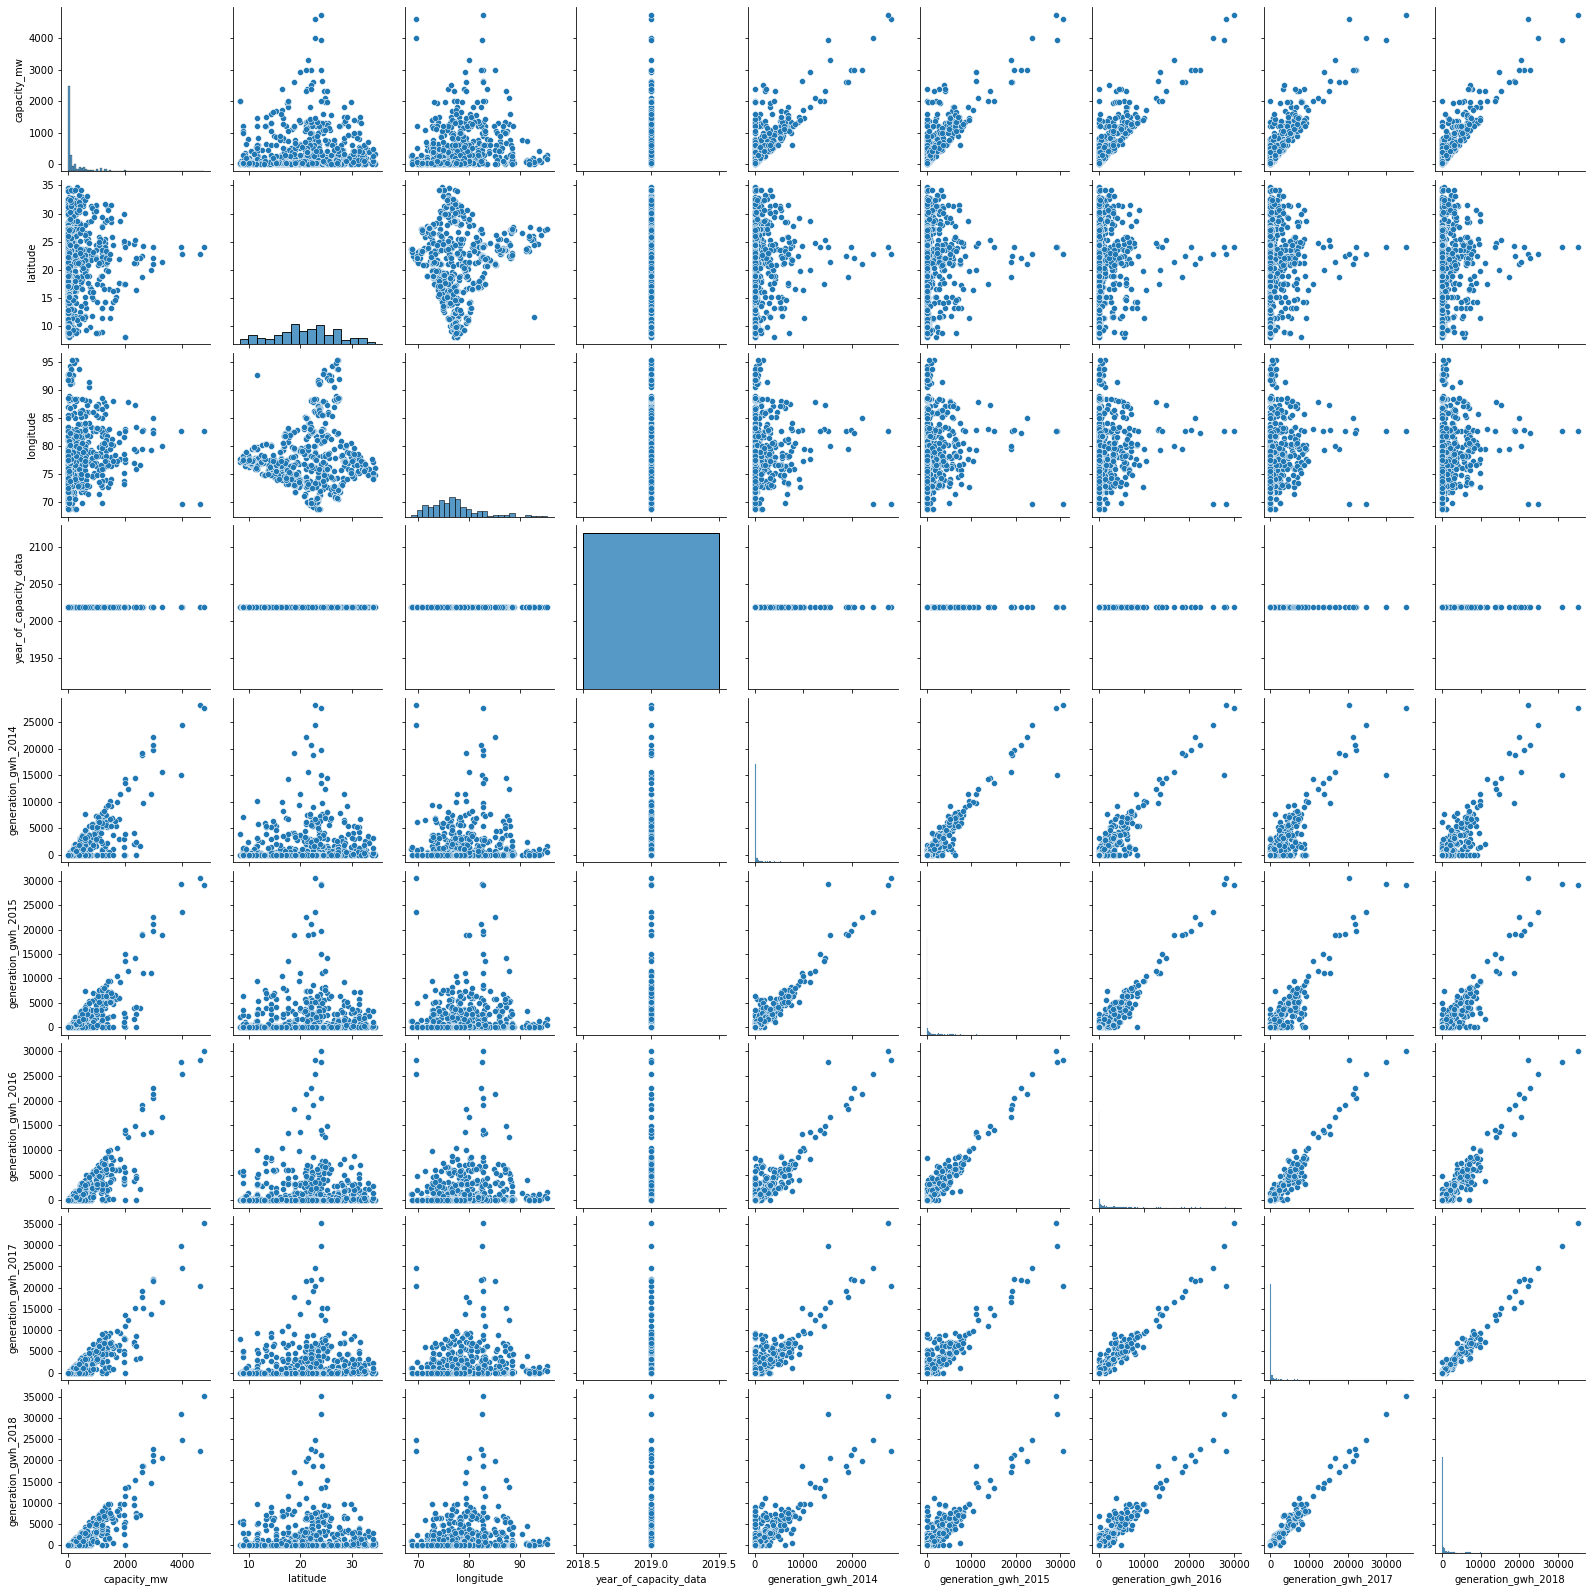

In [31]:
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

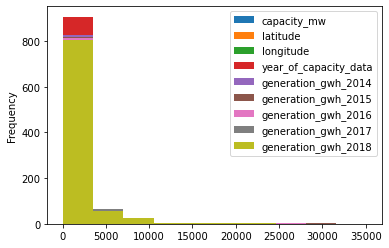

In [32]:
df.plot(kind="hist")

# Correlation:

In [33]:
df.corr()

,capacity_mw,latitude,longitude,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.059041,0.215875,NaN,0.815794,0.842964,0.876811,0.894259,0.906774
latitude,0.059041,1.000000,0.055202,NaN,0.069720,0.065570,0.059028,0.074148,0.069124
longitude,0.215875,0.055202,1.000000,NaN,0.159848,0.173429,0.194916,0.210447,0.209615
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.815794,0.069720,0.159848,NaN,1.000000,0.966869,0.938079,0.907753,0.898900
generation_gwh_2015,0.842964,0.065570,0.173429,NaN,0.966869,1.000000,0.974772,0.944057,0.936856
generation_gwh_2016,0.876811,0.059028,0.194916,NaN,0.938079,0.974772,1.000000,0.976470,0.967814
generation_gwh_2017,0.894259,0.074148,0.210447,NaN,0.907753,0.944057,0.976470,1.000000,0.988117
generation_gwh_2018,0.906774,0.069124,0.209615,NaN,0.898900,0.936856,0.967814,0.988117,1.000000


In [34]:
df=df.drop(["year_of_capacity_data"],axis=1)
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority


In [35]:
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.059041,0.215875,0.815794,0.842964,0.876811,0.894259,0.906774
latitude,0.059041,1.000000,0.055202,0.069720,0.065570,0.059028,0.074148,0.069124
longitude,0.215875,0.055202,1.000000,0.159848,0.173429,0.194916,0.210447,0.209615
generation_gwh_2014,0.815794,0.069720,0.159848,1.000000,0.966869,0.938079,0.907753,0.898900
generation_gwh_2015,0.842964,0.065570,0.173429,0.966869,1.000000,0.974772,0.944057,0.936856
generation_gwh_2016,0.876811,0.059028,0.194916,0.938079,0.974772,1.000000,0.976470,0.967814
generation_gwh_2017,0.894259,0.074148,0.210447,0.907753,0.944057,0.976470,1.000000,0.988117
generation_gwh_2018,0.906774,0.069124,0.209615,0.898900,0.936856,0.967814,0.988117,1.000000


<AxesSubplot:>

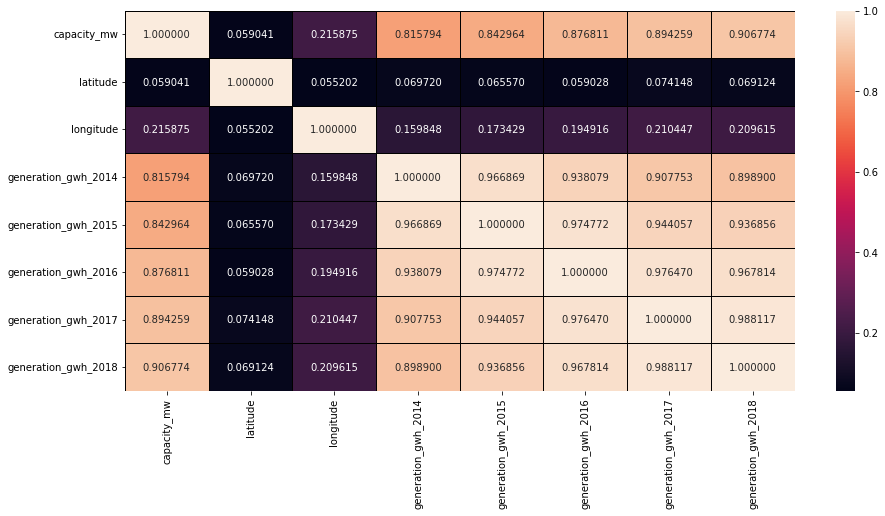

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="black",fmt='2f')

# Correlation ovservation

latitude is very nagetively correlated

longitude is very weakly correlated

generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 this are very strongly correlated

In [37]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.086467,77.172109,1067.106713,1129.781446,1180.909147,1235.958207,1284.630911
std,590.085456,6.098262,4.976401,2926.078576,3105.552487,3131.100641,3187.208175,3298.251107
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,73.811550,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.200000,21.281800,76.493800,0.000000,0.000000,0.000000,0.000000,0.000000
75%,385.250000,25.176450,79.206100,556.562750,598.926350,670.039394,709.290725,687.754000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


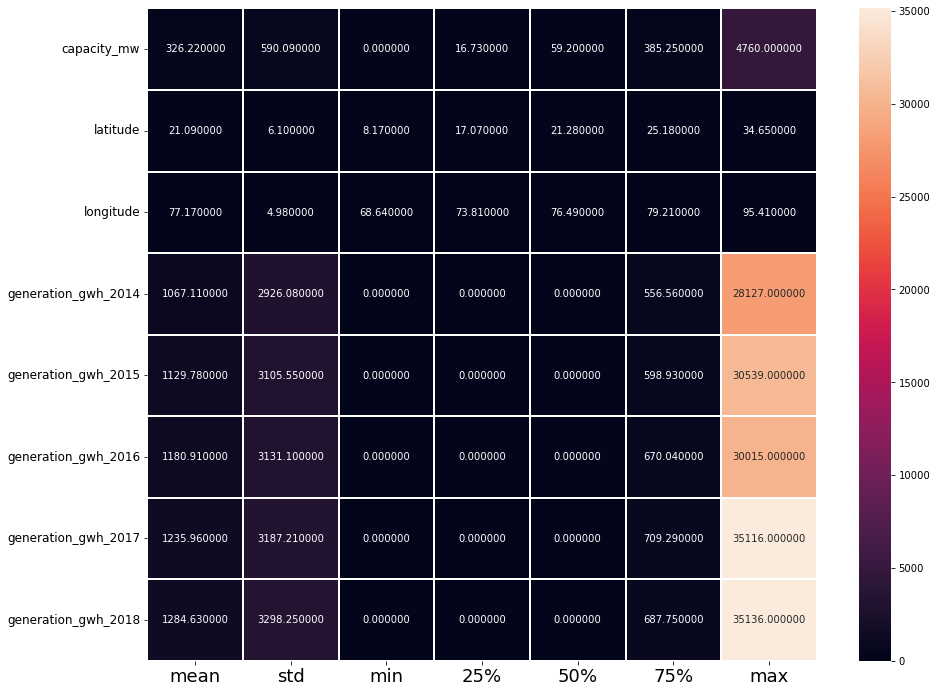

In [38]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12) 
plt.show()

# Observation:

latitude

mean:21

median:21

min:8

Max: 34

longitude

mean:77

median:76

min:68

Max: 95

generation_gwh_2014	

mean:1067

median:0

min:0

Max: 28127

generation_gwh_2015

mean:1129

median:0

min:0

Max: 30539

generation_gwh_2016

mean:1180

median:0

min:0

Max: 30015

generation_gwh_2017

mean:1235

median:0

min:0

Max: 35116

generation_gwh_2018

mean:1284

median:0

min:0

Max: 35136

# Here we have seen two target varriables are there .......so at first target  capacity_mw which is a regression type

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

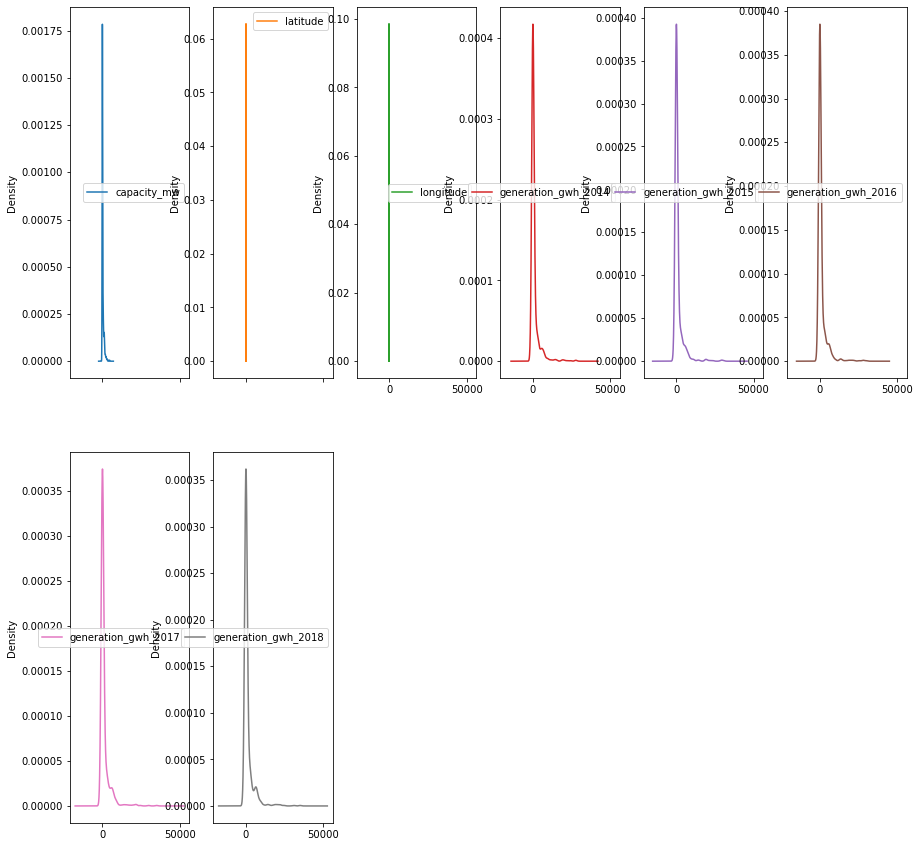

In [39]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,15))

# It seems Data are normally distributed and some slewness are present

# Checking the distribution of the continous value of the float type columns

In [40]:
df_visualization_continous=df[['capacity_mw','latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']].copy()

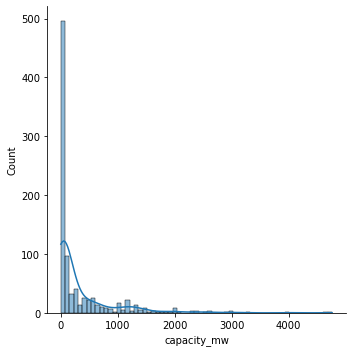

In [41]:
sns.displot(df_visualization_continous['capacity_mw'],kde=True)

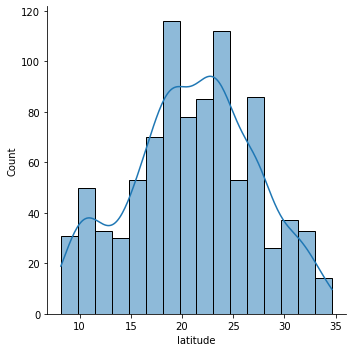

In [42]:
sns.displot(df_visualization_continous['latitude'],kde=True)

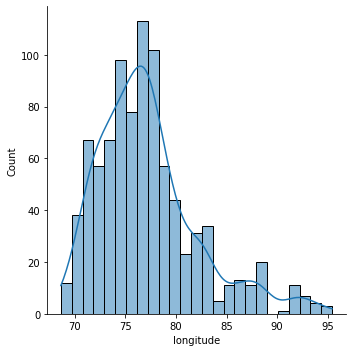

In [43]:
sns.displot(df_visualization_continous['longitude'],kde=True)

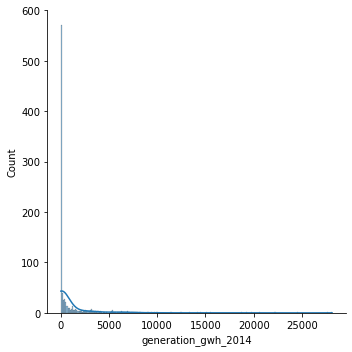

In [44]:
sns.displot(df_visualization_continous['generation_gwh_2014'],kde=True)

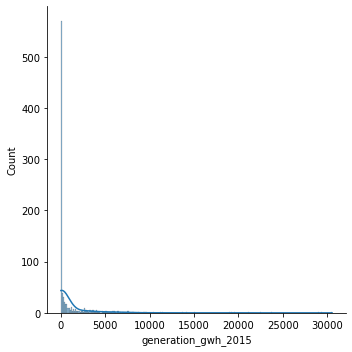

In [45]:
sns.displot(df_visualization_continous['generation_gwh_2015'],kde=True)

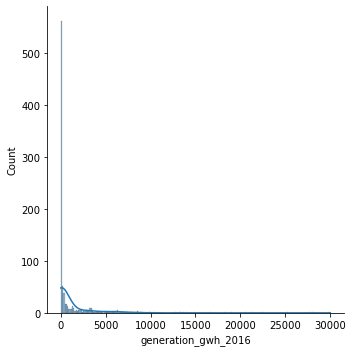

In [46]:
sns.displot(df_visualization_continous['generation_gwh_2016'],kde=True)

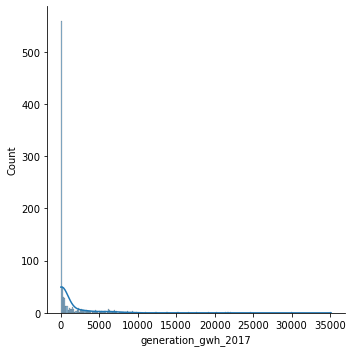

In [47]:
sns.displot(df_visualization_continous['generation_gwh_2017'],kde=True)

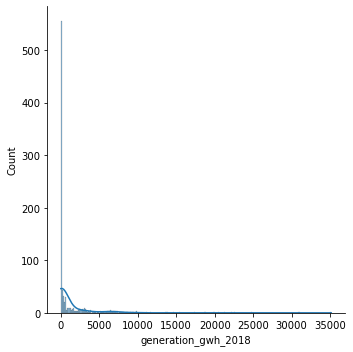

In [48]:
sns.displot(df_visualization_continous['generation_gwh_2018'],kde=True)

In [49]:
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()

In [50]:
df["primary_fuel"]=Le.fit_transform(df["primary_fuel"])

In [51]:
Le.inverse_transform([0,1,2,3,4,5,6,7])

array(['Biomass', 'Coal', 'Gas', 'Hydro', 'Nuclear', 'Oil', 'Solar',
       'Wind'], dtype=object)

In [52]:
df["primary_fuel"].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [53]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,owner,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,6,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,1,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,7,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,2,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,1,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,1,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,0.000000,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,6,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,7,Acc Acc ltd,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,1,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,0.000000,0.000000,0.000000,0.000000,0.000000,Central Electricity Authority


In [54]:
df=df.drop(["country"],axis=1)

In [55]:
df=df.drop(["gppd_idnr"],axis=1)

In [56]:
df=df.drop(["owner"],axis=1)

In [57]:
df=df.drop(["source"],axis=1)

In [58]:
df=df.drop(["geolocation_source"],axis=1)

In [59]:
df=df.drop(["url"],axis=1)

In [60]:
df=df.drop(["name"],axis=1)

In [61]:
df=df.drop(["generation_data_source"],axis=1)

In [62]:
df=df.drop(["country_long"],axis=1)

# Separating the columns into feature and target

In [63]:
features=df.drop("capacity_mw",axis=1)
target=df["capacity_mw"]

In [64]:
features.columns

Index(['latitude', 'longitude', 'primary_fuel', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

In [65]:
target

0         2.5
1        98.0
2        39.2
3       135.0
4      1800.0
        ...  
902    1600.0
903       3.0
904      25.5
905      80.0
906      16.5
Name: capacity_mw, Length: 907, dtype: float64

In [66]:
features

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6,0.000000,0.000000,0.000000,0.000000,0.000000
1,24.7663,74.6090,1,0.000000,0.000000,0.000000,0.000000,0.000000
2,21.9038,69.3732,7,0.000000,0.000000,0.000000,0.000000,0.000000
3,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,0.000000,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,6,0.000000,0.000000,0.000000,0.000000,0.000000
904,15.2758,75.5811,7,0.000000,0.000000,0.000000,0.000000,0.000000
905,24.3500,73.7477,1,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
features.shape

(907, 8)

In [68]:
features.skew().sort_values(ascending=False)

generation_gwh_2015    5.260778
generation_gwh_2014    4.986588
generation_gwh_2016    4.984874
generation_gwh_2017    4.979870
generation_gwh_2018    4.846091
longitude              1.130252
primary_fuel           0.472251
latitude              -0.095721
dtype: float64

In [69]:
features

,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,28.1839,73.2407,6,0.000000,0.000000,0.000000,0.000000,0.000000
1,24.7663,74.6090,1,0.000000,0.000000,0.000000,0.000000,0.000000
2,21.9038,69.3732,7,0.000000,0.000000,0.000000,0.000000,0.000000
3,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,0.000000,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,6,0.000000,0.000000,0.000000,0.000000,0.000000
904,15.2758,75.5811,7,0.000000,0.000000,0.000000,0.000000,0.000000
905,24.3500,73.7477,1,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:

features.shape

(907, 8)

In [71]:
features.skew().sort_values(ascending=False)

generation_gwh_2015    5.260778
generation_gwh_2014    4.986588
generation_gwh_2016    4.984874
generation_gwh_2017    4.979870
generation_gwh_2018    4.846091
longitude              1.130252
primary_fuel           0.472251
latitude              -0.095721
dtype: float64

In [72]:
from sklearn.preprocessing import power_transform

In [73]:
features_new=power_transform(features)

In [74]:
type(features_new)

numpy.ndarray

# Skewness

In [75]:
sk=features.skew()
sk

latitude              -0.095721
longitude              1.130252
primary_fuel           0.472251
generation_gwh_2014    4.986588
generation_gwh_2015    5.260778
generation_gwh_2016    4.984874
generation_gwh_2017    4.979870
generation_gwh_2018    4.846091
dtype: float64

In [76]:

sk[np.abs(sk)>0.5].all()

True

In [77]:
sk[np.abs(sk)>0.5].all()

True

In [78]:
features.skew()[np.abs(features.skew())<0.25].all()

True

In [79]:
features=power_transform(features,method='yeo-johnson')

In [80]:
features.skew()[np.abs(features.skew())<0.25].all()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

# Skewness hasbeen removed

# Checking Outlayers

In [81]:
from sklearn.preprocessing import LabelEncoder
for column in df:
    if df[column].dtypes == 'object':
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])

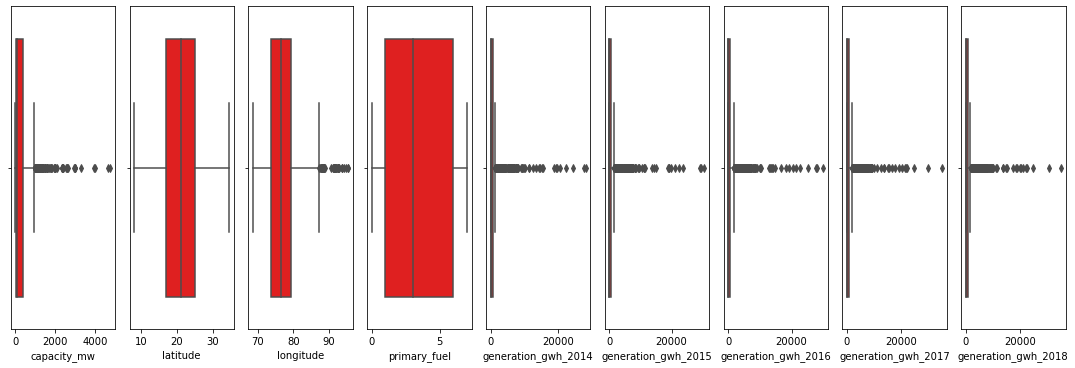

In [82]:
colist=df.columns.values
graph=1
plt.figure(figsize=(15,20))
for i in range(0, len(colist)):
    plt.subplot(4,9,graph)
    sns.boxplot(df[colist[i]],color='red',orient='h')
    graph+=1
    plt.tight_layout()

We have seen some outlayers are present

In [83]:
from scipy.stats import zscore

In [84]:
(np.abs(zscore(features))<3).all()

True

In [85]:
z=np.abs(zscore(features))
z.shape

(907, 8)

In [86]:
threshold=3 #rule of thumb
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [87]:
len(np.where(z>3)[0])

0

So there is no outlayer is present

In [88]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
features_scaled=sc.fit_transform(features)
features_scaled

array([[ 1.16782905, -0.82677572,  1.1713128 , ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.60087083, -0.43171855, -0.99629108, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.12841314, -2.23126386,  1.4415761 , ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       ...,
       [-0.95543806, -0.17729966,  1.4415761 , ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [ 0.53201699, -0.67505367, -0.99629108, ..., -0.8729758 ,
        -0.87813097, -0.88378789],
       [-1.81556656,  0.26406909,  1.4415761 , ..., -0.8729758 ,
        -0.87813097, -0.88378789]])

# Sacling the data using MIN MAX Scaler:

In [89]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(target_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(target_test,pred_test)}")
    print("\n")    
    

At random state0,the training accuracy is :- 0.40009650789650975
At random state0,the testing accuracy is :- 0.41089380455669977


At random state1,the training accuracy is :- 0.41802201537203887
At random state1,the testing accuracy is :- 0.33726650077841336


At random state2,the training accuracy is :- 0.40183373716011805
At random state2,the testing accuracy is :- 0.4180355637620631


At random state3,the training accuracy is :- 0.3906824130394202
At random state3,the testing accuracy is :- 0.4691656291303551


At random state4,the training accuracy is :- 0.4070903117153878
At random state4,the testing accuracy is :- 0.39280030664714705


At random state5,the training accuracy is :- 0.3984673146547908
At random state5,the testing accuracy is :- 0.42566324395708344


At random state6,the training accuracy is :- 0.4173691021362447
At random state6,the testing accuracy is :- 0.3502144104271213


At random state7,the training accuracy is :- 0.4026677081149287
At random state7,the testi

At random state97,the training accuracy is :- 0.4143070586991954
At random state97,the testing accuracy is :- 0.35196742049490126


At random state98,the training accuracy is :- 0.3672556267437458
At random state98,the testing accuracy is :- 0.5335087215818499


At random state99,the training accuracy is :- 0.39397071958370655
At random state99,the testing accuracy is :- 0.4602493532297971




In [92]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [93]:
lr.fit(features_train,target_train)

LinearRegression()

In [94]:
pred_test=lr.predict(features_test)

In [95]:
print(r2_score(target_test,pred_test))

0.36177789359292223


Let's see model is overfitted or not

# Cross valiidation of the model

In [96]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,features,target,cv=j)
    cv_mean=cv_score.mean()
    print(f"at cross fold{j} the cross score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing{Test_accuracy}")
    print("\n")

at cross fold2 the cross score is 0.3475728732528199 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold3 the cross score is 0.3660969587616149 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold4 the cross score is 0.3785827705568575 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold5 the cross score is 0.37833160729442444 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold6 the cross score is 0.3808131790156086 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold7 the cross score is 0.384026316101768 and accuracy score for training is -0.3723644891966309 and accuracy score for testing0.36177789359292223


at cross fold8 the cross score is 0.3785

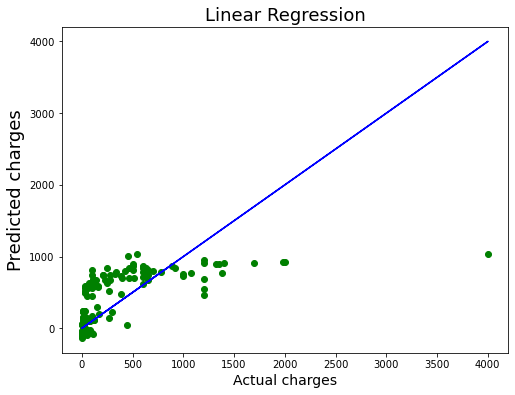

In [97]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=target_test,y=pred_test,color='g')
plt.plot(target_test,target_test,color='b')
plt.xlabel('Actual charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [99]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,10],'random_state':list(range(0,10))}

In [100]:
ls=Lasso()
clif=GridSearchCV(ls,parameters)
clif.fit(features_train,target_train)
print(clif.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [101]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls=ls.predict(features_test)
lss=r2_score(target_test,pred_ls)
lss

0.36162199270726614

In [102]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.3784949890279131

# Ensamble method

In [103]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()
parameters={'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]}
rf=RandomForestRegressor
clf=GridSearchCV(estimator, parameters, n_jobs=-1, cv=5)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'max_depth': 7, 'max_features': 'log2', 'n_estimators': 500, 'random_state': 18}


In [105]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
pred_decision=rf.predict(features_test)
rfs=r2_score(target_test,pred_decision)
print("R2 score:",rfs*100)
rfscore=cross_val_score(rf,features,target,cv=5)
rfc=rfscore.mean()
print("Cross_val_score:",rfc*100)

R2 score: 90.73895141261357
Cross_val_score: 85.36678241147526


# We are getting accuracy and cross validation both as 90% which shows model performing very well

In [106]:
import pickle
filename='Global.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:

In [107]:
loaded_model=pickle.load(open('Global.pkl','rb'))
results=loaded_model.score(features_test,target_test)


In [108]:
results

0.9073895141261357

In [109]:
conclusion=pd.DataFrame([loaded_model.predict(features_test)[:],pred_decision[:]],index=['Predicted','Orginal'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
Predicted,7.737,35.644178,27.052867,121.332,124.4,10.13,371.86624,5.56,558.856,7.737,...,4.304,379.25404,129.6454,16.8745,697.596,17.733,23.832,92.941,15.569,1095.45
Orginal,7.737,35.644178,27.052867,121.332,124.4,10.13,371.86624,5.56,558.856,7.737,...,4.304,379.25404,129.6454,16.8745,697.596,17.733,23.832,92.941,15.569,1095.45


# now Let's target primary_fuel column

In [110]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,1,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,1,0.000000,0.000000,0.000000,0.000000,0.000000


In [111]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [112]:
df.shape

(907, 9)

In [113]:
df.loc[(df['primary_fuel']<7.0),'primary_fuel']=0
df.loc[(df['primary_fuel']>7.0),'primary_fuel']=1

In [114]:
df

,capacity_mw,latitude,longitude,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,0,0.000000,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,7,0.000000,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,0,0.000000,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,0,0.000000,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,7,0.000000,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,0,0.000000,0.000000,0.000000,0.000000,0.000000


In [115]:
x=df.drop(["primary_fuel"],axis=1)
y=df["primary_fuel"]#target varriable

In [116]:
x.shape

(907, 8)

In [121]:
x.columns

Index(['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

# VIF

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
def calc_vif():
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(vif)

In [123]:
calc_vif()

             variables  VIF FACTOR
0          capacity_mw    7.443823
1             latitude   12.766706
2            longitude   13.108151
3  generation_gwh_2014   17.644605
4  generation_gwh_2015   43.250945
5  generation_gwh_2016   55.797004
6  generation_gwh_2017   68.195559
7  generation_gwh_2018   55.754994


Here we have seen high multicollinearity present in  generation_gwh_2017 column ....so we should drop that column

In [117]:
x=x.drop(["generation_gwh_2017"],axis=1)

In [118]:
x

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2018
0,2.5,28.1839,73.2407,0.000000,0.000000,0.000000,0.000000
1,98.0,24.7663,74.6090,0.000000,0.000000,0.000000,0.000000
2,39.2,21.9038,69.3732,0.000000,0.000000,0.000000,0.000000
3,135.0,23.8712,91.3602,617.789264,843.747000,886.004428,626.239128
4,1800.0,21.9603,82.4091,3035.550000,5916.370000,6243.000000,7279.000000
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,0.000000,0.994875,233.596650,686.500000
903,3.0,12.8932,78.1654,0.000000,0.000000,0.000000,0.000000
904,25.5,15.2758,75.5811,0.000000,0.000000,0.000000,0.000000
905,80.0,24.3500,73.7477,0.000000,0.000000,0.000000,0.000000


# Standard scaller

In [119]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.54890755,  1.16448733, -0.79044643, ..., -0.36399474,
        -0.37736273, -0.3897034 ],
       [-0.38697729,  0.60375613, -0.51533699, ..., -0.36399474,
        -0.37736273, -0.3897034 ],
       [-0.48667885,  0.1341011 , -1.56804325, ..., -0.36399474,
        -0.37736273, -0.3897034 ],
       ...,
       [-0.50990864, -0.95336566, -0.31988725, ..., -0.36399474,
        -0.37736273, -0.3897034 ],
       [-0.41749818,  0.53545312, -0.68850936, ..., -0.36399474,
        -0.37736273, -0.3897034 ],
       [-0.52516908, -1.82973786,  0.06126086, ..., -0.36399474,
        -0.37736273, -0.3897034 ]])

# Let's traning the data set

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [121]:
from sklearn.metrics import classification_report,confusion_matrix

In [122]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("randam state=",i,"The model is performing very wel")
        print("Traning accuracy score is=",i)
        print("Testing accuracy score is=",i)

randam state= 75 The model is performing very wel
Traning accuracy score is= 75
Testing accuracy score is= 75
randam state= 76 The model is performing very wel
Traning accuracy score is= 76
Testing accuracy score is= 76
randam state= 78 The model is performing very wel
Traning accuracy score is= 78
Testing accuracy score is= 78
randam state= 100 The model is performing very wel
Traning accuracy score is= 100
Testing accuracy score is= 100
randam state= 113 The model is performing very wel
Traning accuracy score is= 113
Testing accuracy score is= 113
randam state= 131 The model is performing very wel
Traning accuracy score is= 131
Testing accuracy score is= 131
randam state= 146 The model is performing very wel
Traning accuracy score is= 146
Testing accuracy score is= 146
randam state= 207 The model is performing very wel
Traning accuracy score is= 207
Testing accuracy score is= 207
randam state= 229 The model is performing very wel
Traning accuracy score is= 229
Testing accuracy score 

In [123]:
print(classification_report(y_test,pred_test))
print(accuracy_score(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       160
           7       0.00      0.00      0.00        22

    accuracy                           0.88       182
   macro avg       0.44      0.50      0.47       182
weighted avg       0.77      0.88      0.82       182

0.8791208791208791


Logistic Regrassion accuracy score is 87

In [124]:
print(confusion_matrix(y_test,pred_test))

[[160   0]
 [ 22   0]]


HERE TRUE POSITIVE 160 AND TRUE NAGETIVE 0

# DecisionTreeClassifier

In [125]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 91.75824175824175
[[148  12]
 [  3  19]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       160
           7       0.61      0.86      0.72        22

    accuracy                           0.92       182
   macro avg       0.80      0.89      0.83       182
weighted avg       0.94      0.92      0.92       182



here accuracy_score is 92 and true positive rate is 149 and true nagetive rate is 20

# RandomForestClassifier

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 91.75824175824175
[[151   9]
 [  6  16]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       160
           7       0.64      0.73      0.68        22

    accuracy                           0.92       182
   macro avg       0.80      0.84      0.82       182
weighted avg       0.92      0.92      0.92       182



Here  accuracy_score is 91 and true positive rate is 151 nad true nagetive rate is 16

# SVC

In [129]:
from sklearn.svm import SVC

In [130]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 87.91208791208791
[[160   0]
 [ 22   0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       160
           7       0.00      0.00      0.00        22

    accuracy                           0.88       182
   macro avg       0.44      0.50      0.47       182
weighted avg       0.77      0.88      0.82       182



# Let's check cv ...and see model is overfitted or not

In [131]:
from sklearn.model_selection import cross_val_score

# RandomForestClassifier

In [132]:
scr=cross_val_score(rf,x,y,cv=5)
print("CV score for Random Forest Model:",scr.mean())

CV score for Random Forest Model: 0.9173274239572582


cv score and accuracy_score are almost same

# SVC

In [133]:
scr1=cross_val_score(svc,x,y,cv=5)
print("CV score for SVC Model:",scr1.mean())

CV score for SVC Model: 0.8643919616295307


here also cv score and accuracy score are almost same

# logistic

In [134]:
scr2=cross_val_score(lr,x,y,cv=5)
print("CV score for Logistic Model:",scr2.mean())

CV score for Logistic Model: 0.867688664926234


# Here also same

Cv for RandomForestClassifier

In [135]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.867688664926234 
The accuracy score is:- [0.8956044  0.92307692 0.90607735 0.9281768  0.93370166]


CV for SVC

In [136]:
lsscore_selected=cross_val_score(svc,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr)

The cv score is:- 0.8643919616295307 
The accuracy score is:- [0.8956044  0.92307692 0.90607735 0.9281768  0.93370166]


CV for LR

In [137]:
lsscore_selected=cross_val_score(lr,x,y,cv=5).mean()
print("The cv score is:-",lsscore_selected,"\nThe accuracy score is:-",scr2)

The cv score is:- 0.867688664926234 
The accuracy score is:- [0.86813187 0.87362637 0.86740331 0.86740331 0.86187845]


# HYPERMETER TUNNING¶

In [138]:
RandomForestClassifier()

RandomForestClassifier()

In [139]:
from sklearn.model_selection import GridSearchCV

In [140]:
parameters={"max_features":['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}

In [141]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt'}

In [142]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [143]:
GCV.best_estimator_

RandomForestClassifier(max_depth=6, max_features='sqrt')

In [146]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.9395604395604396

# Model is performing 93% well

# Model saving

In [147]:
import pickle
filename='Global_power_plant.pkl'
pickle.dump(rf,open(filename,'wb'))